#Linear Regression for a single feature

In [2]:

from urllib.request import urlretrieve
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


#URL for dataset
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

#loading to csv file
urlretrieve(url,'medical.csv')

#creating DataFrame
mdf=pd.read_csv('medical.csv')

lets find a way estimating the value of 'charges' using value of 'age' of 'non-smokers'.

In [3]:
non_smokerdf=mdf[mdf.smoker=='no']

lets visualize relation between age and charges

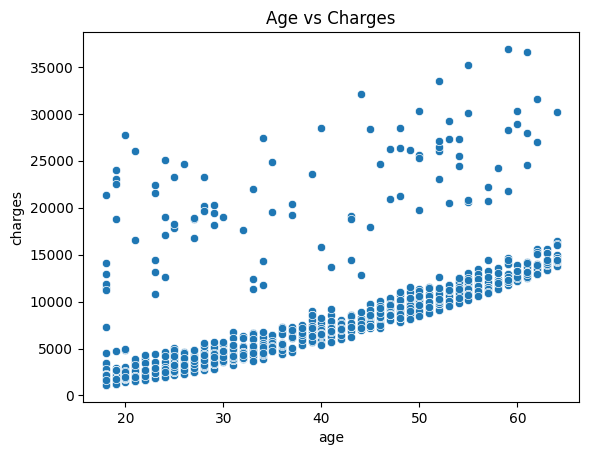

In [5]:
plt.title('Age vs Charges')
sns.scatterplot(x='age',y='charges',data=non_smokerdf);

We will try and 'fit' a line using above points and use a line to predict the charges of given age

A line on X,Y coordinates has formula y= wx + b; w=weight, b=bias

lets define a helper function 'cal_charges' for calculation

In [6]:
def cal_charges(age,w,b):
  return w * age + b

lets assume the values of w and b to calculate the charges

In [32]:
w= 50
b= 100

In [28]:
cal_charges(25,w,b)

2600

lets estimate the cahrges with the ages in dataset

In [33]:
ages=non_smokerdf.age
estimated_charges=cal_charges(ages,w,b)
print(estimated_charges)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64


In [34]:
print(non_smokerdf.charges)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


---
The values are far more than the estimated charges.
Let us plot a line for ages and estimated charges and see the relation



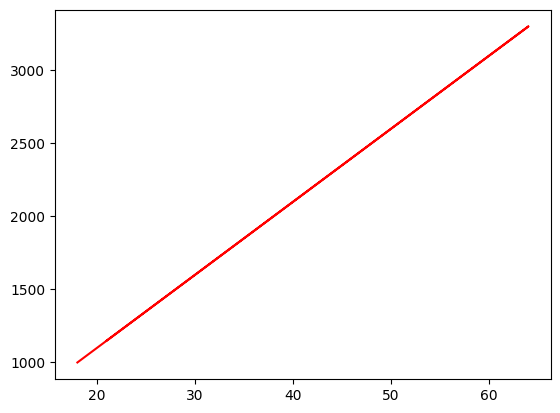

In [35]:
plt.plot(ages,estimated_charges,'r-');

lets plot actual data on estimted data and compare how well our model fits the data

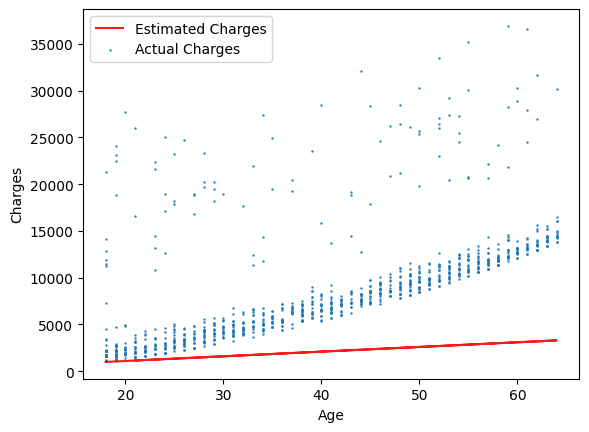

In [36]:
targets=non_smokerdf.charges
plt.plot(ages,estimated_charges,'r', alpha=0.9)

plt.scatter(ages,targets,s=0.7, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated Charges','Actual Charges']);

Our model doesn't fit the actual data. Lets try by changing the parameters w and b creating a helper funtion and try to change values until our model best fits the actual data.

In [39]:
def change_params(w,b):
  estimated_charges=cal_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r', alpha=0.9)

  plt.scatter(ages,targets,s=0.7, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimated Charges','Actual Charges']);

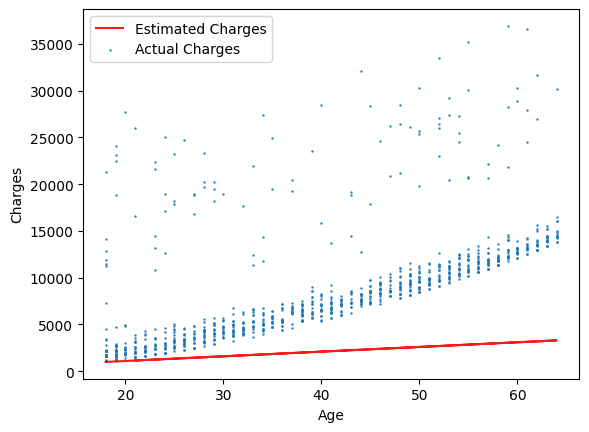

In [40]:
change_params(50,100)

check by changing the params until you get the best fit

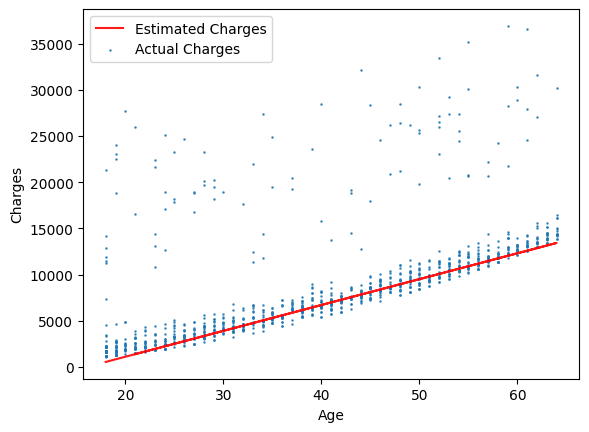

In [66]:
change_params(280,-4500)

## Loss/Cost Function
let us create a loss/cost function to findout how far is the values to the line. Using RMSE.

In [67]:
import numpy as np

In [74]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

lets calculate RMSE with sample set of weights

In [80]:
targets=non_smokerdf.charges
estimated_charges=cal_charges(ages,w,b)

In [81]:
rmse(targets,estimated_charges)

8461.949562575493

Lets modify the change_params function to print loss for our values

In [82]:
def change_params(w,b):
  estimated_charges=cal_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r', alpha=0.9)

  plt.scatter(ages,targets,s=0.7, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimated Charges','Actual Charges']);

  loss=rmse(targets,estimated_charges)
  print('RMSE Loss:',loss)

RMSE Loss: 4873.301227056433


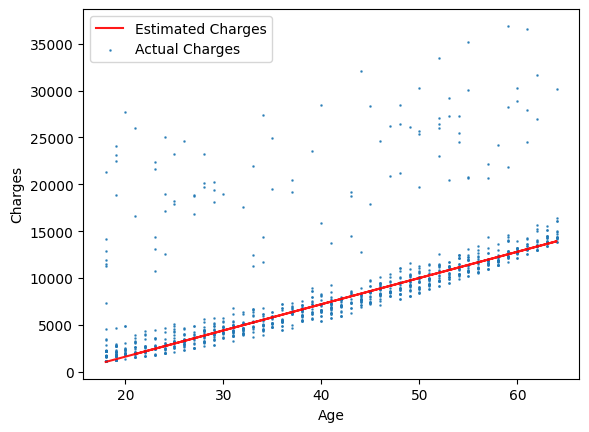

In [84]:
change_params(280,-4000)

## Training Linear Regression model using Scikit Learn

In [91]:
from sklearn.linear_model import LinearRegression

Create a new model object

In [92]:
model=LinearRegression()

Every model in scikit learn has fit model. We can use fit model to get best fit line for inputs and targets

In [93]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



We have to make sure that input x must have 2d array and input y can have either arrray or 2d array.

In [94]:
inputs=non_smokerdf[['age']]
targets=non_smokerdf['charges']

#let make sure shapes
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


Lets fit the model to the data

In [95]:
model.fit(inputs,targets)

LinearRegression()

Lets compute the predictions and compare them

In [96]:
predictions=model.predict(inputs)
print(predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [97]:
print(targets)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


Not so bad. There are some outliers in the data, which may affect the model.
let us calculate rms loss

In [98]:
rmse(targets,predictions)

4662.505766636395

Our model is pretty good. on average, we have nearly 1000 difference in the targets and predictions.

---
The final parameters of model are stored in w=coeff_ and b=intercept_

In [99]:
#coeff
print(model.coef_)

[267.24891283]


In [100]:
#intercept_
print(model.intercept_)

-2091.4205565650864


Let us plot with the new values

RMSE Loss: 4662.505766636395


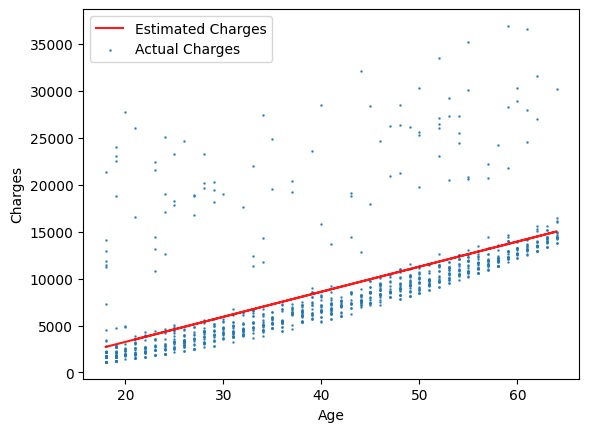

In [101]:
change_params(model.coef_,model.intercept_)

# Linear regression using multiple features

We will add extra feature "bmi" for ages and charges to the model.

Equation of the loss function is charges= w1 * age + w2 * bmi+ b

In [102]:
#create inputs and targets
inputs=non_smokerdf[['age','bmi']]
targets=non_smokerdf['charges']

#create and train model
model=LinearRegression().fit(inputs,targets)

#generate predictions
predictions=model.predict(inputs)

#calculate the loss to evaluate the model
loss=rmse(targets,predictions)
print('RMSE Loss:',loss)

RMSE Loss: 4662.3128354612945


It seems that BMI doesn't reduce the loss, because it doesn't have a much correlation with  charges.

In [103]:
non_smokerdf.charges.corr(non_smokerdf.bmi)

0.0840365431283327

It seems BMI has very low correlation with the charges. Let also check the parameters

In [104]:
print(model.coef_)
print(model.intercept_)

[266.87657817   7.07547666]
-2293.6320906488727


We are not getting a goot fit for the features we have taken so far. We would go and compute with categorical features.